In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
! uv pip install -U "langchain[openai]"

Using Python 3.10.9 environment at: F:\code\ai\langgraph-learn\.venv
Resolved 39 packages in 3.24s
Prepared 1 package in 1.07s
Uninstalled 1 package in 31ms
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 49ms
 - langsmith==0.3.42
 + langsmith==0.3.43


In [3]:
from langchain_openai import ChatOpenAI
import os

llm = ChatOpenAI(model="qwen-plus-latest",base_url="https://dashscope.aliyuncs.com/compatible-mode/v1", 
        api_key=os.getenv("DASHSCOPE_API_KEY"),
        temperature=0)

## 创建Node
Node作为Graph中的工作单元(一个普通的python函数),所以要将llm添加到Node中

In [5]:
def chatbot_node(state: State):
    return {"messages": llm.invoke(state["messages"])}

graph_builder.add_node("chatbot", chatbot_node)

## 添加entry point

In [7]:
graph_builder.add_edge(START, "chatbot")

## 编译Graph

In [8]:
graph = graph_builder.compile()

## 可视化graph
您可以使用 get_graph 方法和其中一种“draw”方法（例如 draw_ascii 或 draw_png 来可视化图形。每种 draw 方法都需要额外的依赖项。

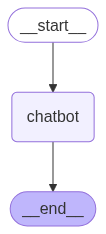

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## 运行chatbot

In [12]:
graph.invoke({"messages": [{"role": "user", "content": "什么是Agent?"}]})

{'messages': [HumanMessage(content='什么是Agent?', additional_kwargs={}, response_metadata={}, id='1e9ddef6-a573-41bf-b7f5-9907e58c1aa4'),
  AIMessage(content='"Agent" 这个词在不同的领域中有不同的含义，下面是一些常见语境下的解释：\n\n---\n\n### 1. **人工智能（AI）中的 Agent**\n在人工智能和计算机科学中，**Agent** 是一个能够感知环境、做出决策并采取行动的实体。它可以是软件程序、机器人或其他形式的智能体。\n\n#### 特征：\n- **感知能力（Perception）**：通过传感器或输入获取环境信息。\n- **决策能力（Reasoning/Planning）**：根据感知到的信息进行推理、规划。\n- **行动能力（Action）**：执行动作影响环境。\n- **目标导向（Goal-oriented）**：为达成某个目标而行为。\n- **自主性（Autonomy）**：能独立运行，不一定需要人类干预。\n\n#### 示例：\n- 游戏中的 AI 角色\n- 自动驾驶汽车\n- 智能助手（如 Siri、Alexa）\n- 推荐系统\n\n---\n\n### 2. **分布式系统中的 Agent**\n在多智能体系统（Multi-Agent Systems, MAS）中，多个 Agent 可以相互协作、通信、竞争或协商来完成任务。\n\n#### 应用场景：\n- 分布式问题求解\n- 协同机器人\n- 智能交通系统\n\n---\n\n### 3. **商业或法律中的 Agent**\n在商业或法律术语中，**Agent** 指的是“代理人”，代表他人或组织行事的人或实体。\n\n#### 示例：\n- 房地产经纪人作为买家或卖家的代理人\n- 经纪人代理客户投资\n- 法律代理人代表当事人出庭\n\n---\n\n### 4. **市场营销中的 Agent**\n有时也指分销商、代理商，负责销售产品或服务。\n\n---\n\n### 5. **化学/医学中的 Agent**\n在科学领域，如化学或医学中，**agent** 可以指某种作用因子或处理手段